CS417 Assignment 5: A Foray Into Bioinformatics
---
# Instructions
Each of the following questions is followed by empty code cell. Add your code for the question to the cell and then execute that cell.  Submit the completed notebook by attaching it to the assignment in Blackboard.


## Problem 1 (Moderate)
We can model the mutation of genes in Python by changing
  a randomly selecting a position in a string representing a DNA
  molecule.

  Remembering that your Glorious Instructor is NOT a molecular
  biologist, note that DNA is a molecule of bases in a double-helix
  structure.  We identify these bases as being of type A, C, G, and T
  and can describe DNA in text strings composed of an alphabet that
  contains those four letters.

  A lot of what happens within the cells in your body is regulated
  through a somewhat-poorly understood mechanism that turns things on or
  off in the genes in your cell.  One part of this mechanism consists of
  molecules called \texttt{transcription factors} that float around in
  your cells and attach to DNA, and thus turning genes on and off. Yes,
  I know that Prof. Cline and Prof. Pittman in our Biology program are
  internally screaming in agony over this simplistic explanation,
  but... I'm not a molecular biologist.

## Example Frequency Table For Sequences TAG, GGT, and GGG
|base|0|1|2|
|----|-|-|-|
|A   |0|1|0|
|C   |0|0|0|
|G   |2|2|2|
|T    |1|0|1|

Transcription factors will bind preferentially to specific DNA sequences
and these binding preferences can be represented by a table of
frequencies of given symbols of each position of a
pattern. The table tells us that if the base A appears once
in index 1 of a DNA string, base C does not occur at all, base G
appears twice in all positions, and base T appears once in the beginning
and end of the strings.

Let's look at how we can store this type of frequency matrix in a Python
program and look at how we can use to do useful (for a bioinformatics
person) things.


In [1]:
def frequencyTable(dnaList):
    n = max([len(dna) for dna in dnaList])
    frequency_matrix = {
        'A': [0]*n,
        'C': [0]*n,
        'G': [0]*n,
        'T': [0]*n
        }
    for dna in dnaList:
        for index,base in enumerate(dna):
            frequency_matrix[base][index] += 1

    return frequency_matrix

  Using the `random.randint()` and
  `random.choice()` functions from the Python `random`
  module, write a function that will mutate a DNA string. Then, use the
  frequency table function  to analyze the changes that
  occur in frequencies if you randomly change 100 positions in a 1000
  gene DNA sequence.   Your program should randomly generate a DNA
  string with 1000 bases, display the frequency table of this string,
  apply 100 mutations to the string, and then print the frequency table
  for the mutated string.

In [41]:
import random
random.seed() #seed based on clock

def roll():
    return random.randint(0,999)

def frequencyTable(dnaList):
    n = max([len(dna) for dna in dnaList])
    frequency_matrix = {
        'A': [0]*n,
        'C': [0]*n,
        'G': [0]*n,
        'T': [0]*n
        }
    for dna in dnaList:
        for index,base in enumerate(dna):
            frequency_matrix[base][index] += 1

    return frequency_matrix

def mutate(current):
    mutation = random.choice(bases)
    while current == mutation:
        mutation = random.choice(bases)
    return mutation

bases = ['A','C','G','T']
dnaStrand = [] #placeholder for generated DNA strand
mutations = [] #each location must be unique
#generate DNA string
for i in range(0,1000):
    dnaStrand.append(random.choice(bases))

print(frequencyTable(dnaStrand))

#generate mutation locations
for i in range(0,100):
    current = roll()
    while current in mutations:
        current = roll()
    mutations.append(current)

#apply mutations flips at locations
for x in mutations:
    #print("Location: %d" % x)
    #print("Current base: %s" % dnaStrand[x])
    dnaStrand[x] = mutate(dnaStrand[x])
    #print("Mutated to: %s" % dnaStrand[x])
    
print(frequencyTable(dnaStrand))

{'A': [240], 'C': [262], 'G': [270], 'T': [228]}
{'A': [251], 'C': [262], 'G': [269], 'T': [218]}


## Problem 2 (Easy)
Use the graphing functions within the `pandas` libary to build a bar chart that compares the two frequency tables from the previous problem.   You will need to construct a data frame and then tell that data frame to graph itself in a bar chart.  You can find a discussion on how to do this at the following URL: [https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/)

Text(0.5, 0, 'DNA Strand')

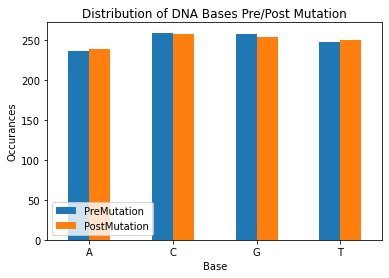

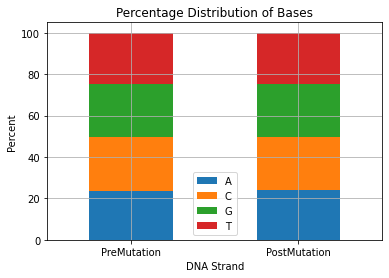

In [1]:
import random
import pandas as pd
from matplotlib import pyplot as plt
random.seed() #seed based on clock

def roll():
    return random.randint(0,999)

def frequencyTable(dnaList):
    n = max([len(dna) for dna in dnaList])
    frequency_matrix = {
        'A': [0]*n,
        'C': [0]*n,
        'G': [0]*n,
        'T': [0]*n
        }
    for dna in dnaList:
        for index,base in enumerate(dna):
            frequency_matrix[base][index] += 1

    return frequency_matrix

def mutate(current):
    mutation = random.choice(bases)
    while current == mutation:
        mutation = random.choice(bases)
    return mutation

bases = ['A','C','G','T']
dnaStrand = [] #placeholder for generated DNA strand
mutations = [] #each location must be unique
#generate DNA string
for i in range(0,1000):
    dnaStrand.append(random.choice(bases))

preMutate = list(frequencyTable(dnaStrand).values())
#remove nested list structure:
preMutateCleaned = [x for y in preMutate for x in y]

#generate mutation locations
for i in range(0,100):
    current = roll()
    while current in mutations:
        current = roll()
    mutations.append(current)

#apply mutations flips at locations
for x in mutations:
    dnaStrand[x] = mutate(dnaStrand[x])
    
postMutate = list(frequencyTable(dnaStrand).values())
postMutateCleaned = [x for y in postMutate for x in y]

#plot data
mutateData = pd.DataFrame({
    "PreMutation":preMutateCleaned,
    "PostMutation":postMutateCleaned
}, index=bases)
mutateData.plot(kind="bar").legend(loc="lower left")
plt.xticks(rotation=0)
plt.title("Distribution of DNA Bases Pre/Post Mutation")
plt.xlabel("Base")
plt.ylabel("Occurances")

#just for fun
preSum = sum(preMutateCleaned)
postSum = sum(postMutateCleaned)
prePercent = [(100*(x/preSum)) for y in preMutate for x in y]
postPercent = [(100*(x/postSum)) for y in postMutate for x in y]
aList=[prePercent[0],postPercent[0]]
cList=[prePercent[1],postPercent[1]]
gList=[prePercent[2],postPercent[2]]
tList=[prePercent[3],postPercent[3]]

percentData = pd.DataFrame({
    "A":aList,
    "C":cList,
    "G":gList,
    "T":tList
}, index=["PreMutation","PostMutation"])
percentData.plot(kind="bar", stacked=True, grid=True)
plt.xticks(rotation=0)
plt.title("Percentage Distribution of Bases")
plt.ylabel("Percent")
plt.xlabel("DNA Strand")
